In [1]:
# Pre-processing
from google.colab import drive
drive.mount('/content/drive')
%run "/content/drive/MyDrive/ME 470 Work/Computational Model/damper.py"
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

Mounted at /content/drive


In [2]:
def obj_fun(x : tuple, *args):
  mu, E = x
  u, n, exp_num, d, rho, D = args

  test_damper = damper(d, D, mu, E, rho, n, exp = exp_num)

  # have to match sim to test so that least_squares has 1:1 data matchup
  test_damper.match_test(u)

  return test_damper.least_squares()

def optimize(*args): # u in mm/s
  import numpy as np
  from scipy.optimize import minimize
  x0 = (700, 100) # realistic starting point
  res = minimize(obj_fun, x0, method='nelder-mead', \
                args = (args), options={'disp': False})
  return res.x

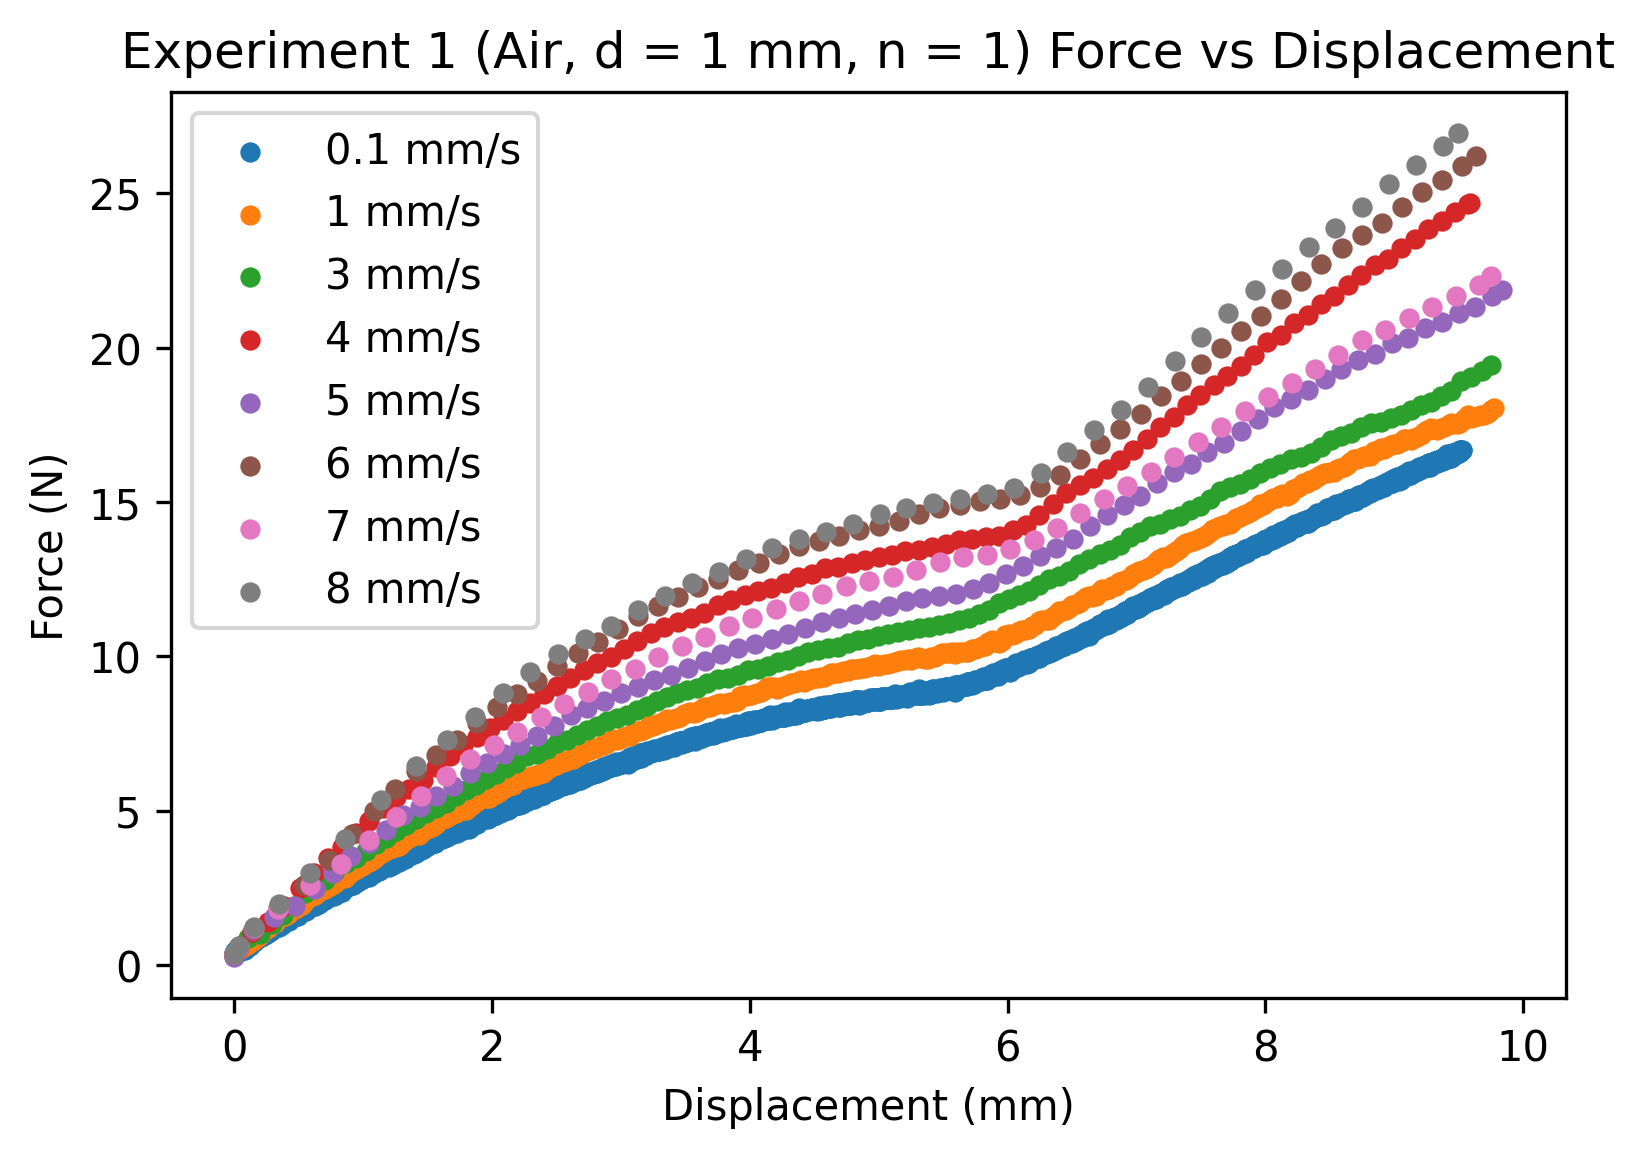

In [3]:
# Plotting Exp 1 test data, parameters are arbitrary since I am not modeling just using class to plot
import matplotlib.pyplot as plt

test_speeds = [0.1, 1, 3, 4, 5, 6, 7, 8]
n = 3
exp_num = 5
d = 2E-3 # m
rho = 1300 # kg/m^3 (toothpaste)
D = (20 + 23.5)/2 * 1E-3 # m
mu = 1 # not relevant, just physical data
E = 1 # not relevant

for speed in test_speeds:
  test_damper = damper(d, D, mu, E, rho, n, exp = 1)
  test_damper.u = speed
  test_damper.process_test()
  plt.scatter(test_damper.test_disp*1e3, test_damper.test_force, label = "{} mm/s".format(speed), s = 15)
plt.title("Experiment 1 (Air, d = 1 mm, n = 1) Force vs Displacement")
plt.xlabel('Displacement (mm)')
plt.ylabel('Force (N)')
plt.legend()
plt.show()